# 1 Preparación de los datos para entrenar nuestros modelos


Los datos fueron compartidos a través de una colaboración en Archivo Historico del Municipio de Centro, los cuales tenian la siguente estructura

![datos](https://i.imgur.com/U9WOf8p.png)

Cada carpeta corresponde a un libro de acta de cabildo diferente, estando organizado de la siguente manera

![organizacion](https://i.imgur.com/kc9wGZZ.png)

En total se tiene mas de 3000 imagenes diferentes. Cada imagen corresponde a un par de páginas de los de sesiones de cabildo. Nuestra primera tarea fue extraer todas las imagenes de cada carpeta para posteriormente separarlas en dos carpetas, imagenes en buen estado e imagenes a resturar.

![separación](https://i.imgur.com/upRB1eq.png)

Podemos ver que tenemos separado esto en dos conjuntos. 

-----

# Creación del dataset de entrenamiento

La forma en que la red neuronal va mejorando es a traves de dos procesos llamados "Feedforward" y "Backpropagation" que en resumen con los datos de entrada genera un resultado y con el resulto mejora los parametros de la red neuronal hasta obtener el resultado deseado. La función "Loss" será la que evaluará el desempeño de nuestro modelo. 

![digrama](https://i.imgur.com/Du8TZSv.png)

Para el tipo de red neural que desarrollaremos, esta evaluación se realiza pixel por pixel, por lo que requerimos, por asi decirlo, dos imagenes espejo en cuanto a las carecteristicas buenas, una en el estado más óptimo posible y otra en un destado deteriorado, es decir, que alguna de los siguentes defectos: manchas, arrugas, palabras duplicadas en la impresión, oxido, sellos, marcas de páginas anteriores, desenfoque, baja legibilidad. 

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

CURRENT_DIR = Path('.').resolve()
MODULES_DIR = CURRENT_DIR.parent.joinpath('src')
sys.path.append(str(MODULES_DIR))
DATA_DIR = CURRENT_DIR.parent.joinpath('data')
DATA_RAW = DATA_DIR.joinpath('Raw','Bien')

In [2]:
files = sorted([f for f in DATA_RAW.iterdir() if f.is_file()])

Vamos a visualizar algunas de las imagenes que tenemos

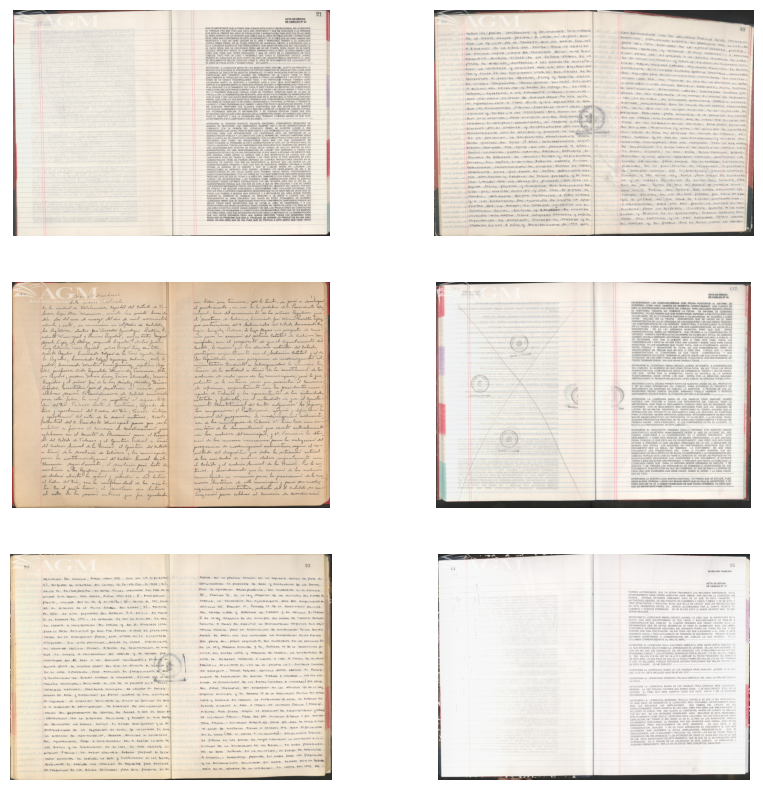

In [29]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import vis
vis.nueve_plot(files)

-----

## Tamaño de las imagenes

Debemos asegurarnos que las imagenes tengan el mismo tamaño, primero veremos con que tamaños aparecen

In [50]:
import numpy as np
tamanos=[]
for i in range(100):
    imagen = load_img(str(random.choice(files)))
    tamanos.append(img_to_array(imagen).shape)
tamanos = np.array(tamanos)

In [60]:
print(tamanos[:,0].mean(),tamanos[:,0].std())
print(tamanos[:,1].mean(),tamanos[:,1].std())
print(tamanos[:,2].mean(),tamanos[:,2].std())

1204.4 27.476171494587817
1701.0 0.0
3.0 0.0


Notamos que tenemos varaición a lo alto de la imagen, por lo que vamos a poner todas las imagenes que trabajemos del mismo tamaño